# Classification: CATS vs DOGS 
    jpeg -> CNN Keras -> [0,1]
---

Import Tensorflow with Keras and Packages

In [1]:
import tensorflow as tf

In [2]:
from time import time
from tensorflow.python.keras.callbacks import TensorBoard

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Activation, Dropout, Flatten, Reshape
from keras.utils import to_categorical

Using TensorFlow backend.


In [4]:
from keras import backend as K

In [5]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13073085169839121274
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1431112499
locality {
  bus_id: 1
  links {
  }
}
incarnation: 112476303537205469
physical_device_desc: "device: 0, name: GeForce MX150, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [7]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
from PIL import Image

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline 

In [9]:
import os

---
### FOLDERS and CATEGORIES:

- Folders

In [10]:
datadir = 'dogVScat'
cat1 = 'dogs'
cat2 = 'cats'

- Training set

In [11]:
target = os.chdir(datadir + "/train/" + cat1)
cat_1 = os.listdir()

In [12]:
target = os.chdir("../" + cat2)
cat_2 = os.listdir()

In [13]:
print("CAT1:",len(cat_1),"CAT2:",len(cat_2), "TOTAL:",len(cat_1)+len(cat_2))

CAT1: 5501 CAT2: 6054 TOTAL: 11555


- Validation set

In [14]:
target = os.chdir("../../validation/" + cat1)
cat_1_val = os.listdir()

In [15]:
target = os.chdir("../" + cat2)
cat_2_val = os.listdir()

In [16]:
print("CAT1:",len(cat_1_val),"CAT2:",len(cat_2_val), "TOTAL:",len(cat_1_val)+len(cat_2_val))

CAT1: 1302 CAT2: 1500 TOTAL: 2802


- Return to Home

In [17]:
os.chdir("../../../")

---
### HYPER PARAMETERS:

- Dimensions
- Epochs
- Batch

In [18]:
###
img_width, img_height = 300, 300
img_depth = 1

###
data_dir = 'dogVScat'
train_data_dir = data_dir + '/train'
validation_data_dir = data_dir + '/validation'
test_data_dir = data_dir + '/test'

nb_train_samples = len(cat_1)+len(cat_2)
nb_validation_samples = len(cat_1_val)+len(cat_2_val)
epochs = 5                                                 # 50
batch_size = 32                                            # 16

---
### CNN MODEL:

- Layers Architecture

In [19]:
if K.image_data_format() == 'channels_first':
    input_shape = (img_depth, img_width, img_height)
else:
    input_shape = (img_width, img_height, img_depth)

model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 298, 298, 16)      160       
_________________________________________________________________
activation_1 (Activation)    (None, 298, 298, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 147, 147, 16)      2320      
_________________________________________________________________
activation_2 (Activation)    (None, 147, 147, 16)      0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [20]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

- Data Generators

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [22]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

- Train VS Validation SET

In [23]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary')

Found 11555 images belonging to 2 classes.


In [24]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='binary')

Found 2802 images belonging to 2 classes.


- Visualize on Tensorboard 

In [25]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

- Model Training 

In [26]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size, callbacks=[tensorboard])

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
361/361 [==============================] - 146s 405ms/step - loss: 0.6778 - acc: 0.5896 - val_loss: 0.6166 - val_acc: 0.6476
Epoch 2/5
361/361 [==============================] - 143s 397ms/step - loss: 0.6082 - acc: 0.6803 - val_loss: 0.5724 - val_acc: 0.7072
Epoch 3/5
361/361 [==============================] - 145s 402ms/step - loss: 0.5631 - acc: 0.7139 - val_loss: 0.5259 - val_acc: 0.7339
Epoch 4/5
361/361 [==============================] - 148s 410ms/step - loss: 0.5332 - acc: 0.7403 - val_loss: 0.5631 - val_acc: 0.7394
Epoch 5/5
361/361 [==============================] - 148s 411ms/step - loss: 0.5210 - acc: 0.7536 - val_loss: 0.4609 - val_acc: 0.7946


- Visualize Learning Rate

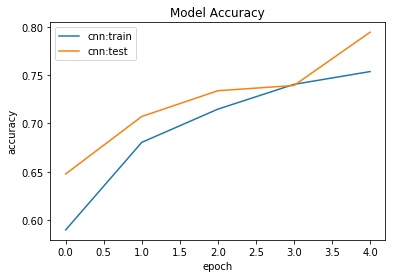

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['cnn:train', 'cnn:test'], loc='upper left')
plt.show()

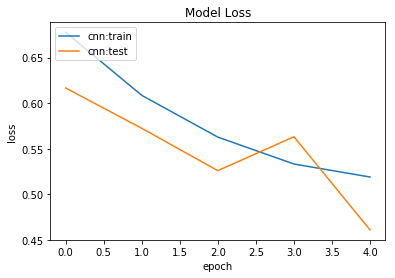

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['cnn:train', 'cnn:test'], loc='upper left')
plt.show()

- Save

In [37]:
model.save_weights('keras_weights_b.h5')
model.save('keras_model_b.h5') 